https://ai.plainenglish.io/how-to-find-outliers-and-anomalies-using-isolation-forest-388e5fec2762

In [101]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy as np
print('numpy: {}'.format(np.__version__))
import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))

Python: 3.11.6 (tags/v3.11.6:8b6ee5b, Oct  2 2023, 14:57:12) [MSC v.1935 64 bit (AMD64)]
scipy: 1.11.1
numpy: 1.23.5
matplotlib: 3.7.1
pandas: 2.0.2
sklearn: 1.3.0
seaborn: 0.12.2


In [102]:
train=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/House-Prices/master/train.csv")
display(train)
train.columns.sort_values()
#train.SaleType.unique()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

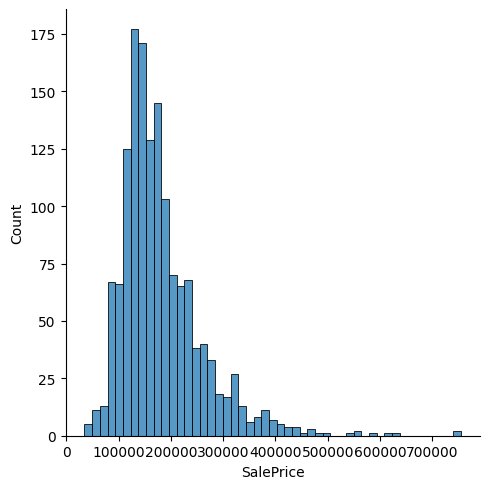

In [103]:
sns.displot(train['SalePrice'])

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8
...,...,...
1455,175000,6
1456,210000,6
1457,266500,7
1458,142125,5


(-0.5, 9.5, 0.0, 800000.0)

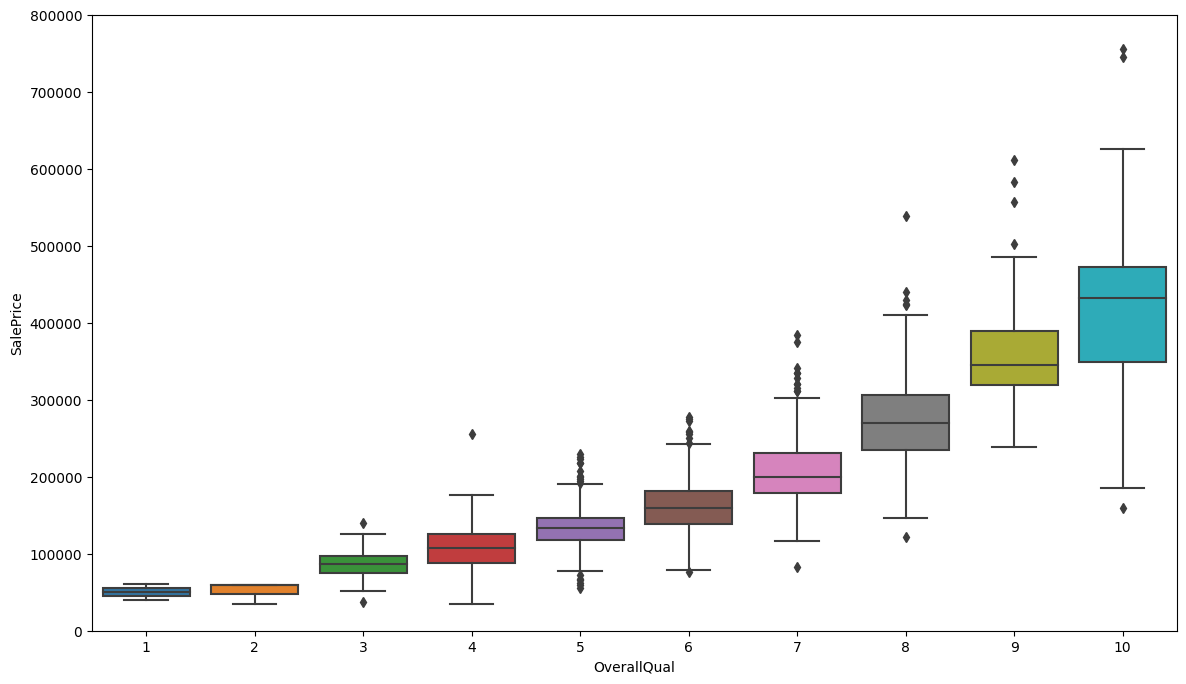

In [104]:
var='OverallQual'
data=pd.concat([train['SalePrice'],train[var]],axis=1)
display(data)
f,ax=plt.subplots(figsize=(14,8))
fig=sns.boxplot(x=var,y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800_000)

In [105]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total,"Percent'])
missing_data.head(20)

,"Total,""Percent"
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [106]:
# fill up missing values with the not listed or median
train['MSZoning'] = train['MSZoning'].fillna('Not Listed')
train['Alley'] = train['Alley'].fillna('Not Listed')
train['Utilities'] = train['Utilities'].fillna('Not Listed')
train['Exterior1st'] = train['Exterior1st'].fillna('Not Listed')
train['Exterior2nd'] = train['Exterior2nd'].fillna('Not Listed')
train["MasVnrType"] = train["MasVnrType"].fillna('Not Listed')
train["MasVnrArea"] = train["MasVnrArea"].fillna(train['MasVnrArea'].median())
train['Electrical'] = train['Electrical'].fillna('Not Listed')
train['KitchenQual'] = train['KitchenQual'].fillna('Not Listed')
train['FireplaceQu'] = train['FireplaceQu'].fillna('Not Listed')
train['PoolQC'] = train['PoolQC'].fillna('Not Listed')
train['MiscFeature'] = train['MiscFeature'].fillna('Not Listed')
train['Fence'] = train['Fence'].fillna('Not Listed')
train['Functional'] = train['Functional'].fillna('Not Listed')
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
train['SaleType'] = train['SaleType'].fillna('Not Listed')
train['GarageType'] = train['GarageType'].fillna('Not Listed')
train['GarageFinish'] = train['GarageFinish'].fillna('Not Listed')
train['GarageQual'] = train['GarageQual'].fillna('Not Listed')
train['GarageCond'] = train['GarageCond'].fillna('Not Listed')
train['BsmtFinSF1'] = train['BsmtFinSF1'].fillna(train['BsmtFinSF1'].median())
train['BsmtFinSF2'] = train['BsmtFinSF2'].fillna(train['BsmtFinSF2'].median())

# for these columns, NA = No Basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
   train[col] = train[col].fillna('None')

   # for these columns, NA is likely to be 0 due to no basement
for col in ('BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
   train[col] = train[col].fillna(0)

# as there is no garage, NA value for this column is set to zero
for col in ('GarageArea', 'GarageCars', 'GarageYrBlt'):
    train[col] = train[col].fillna(0)

In [112]:
#ordinal encoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

train.MSZoning = enc.fit_transform(train.MSZoning.values.reshape(-1,1))
train.Street = enc.fit_transform(train.Street.values.reshape(-1,1))
train.Alley = enc.fit_transform(train.Alley.values.reshape(-1,1))
train.LotShape = enc.fit_transform(train.LotShape.values.reshape(-1,1))
train.LandContour = enc.fit_transform(train.LandContour.values.reshape(-1,1))
train.Utilities = enc.fit_transform(train.Utilities.values.reshape(-1,1))
train.LotConfig = enc.fit_transform(train.LotConfig.values.reshape(-1,1))
train.LandSlope = enc.fit_transform(train.LandSlope.values.reshape(-1,1))
train.Neighborhood = enc.fit_transform(train.Neighborhood.values.reshape(-1,1))
train.Condition1 = enc.fit_transform(train.Condition1.values.reshape(-1,1))
train.Condition2 = enc.fit_transform(train.Condition2.values.reshape(-1,1))
train.BldgType = enc.fit_transform(train.BldgType.values.reshape(-1,1))
train.HouseStyle = enc.fit_transform(train.HouseStyle.values.reshape(-1,1))
train.RoofStyle = enc.fit_transform(train.RoofStyle.values.reshape(-1,1))
train.RoofMatl = enc.fit_transform(train.RoofMatl.values.reshape(-1,1))
train.Exterior1st = enc.fit_transform(train.Exterior1st.values.reshape(-1,1))
train.Exterior2nd = enc.fit_transform(train.Exterior2nd.values.reshape(-1,1))
train.MasVnrType = enc.fit_transform(train.MasVnrType.values.reshape(-1,1))
train.ExterQual = enc.fit_transform(train.ExterQual.values.reshape(-1,1))
train.ExterCond = enc.fit_transform(train.ExterCond.values.reshape(-1,1))
train.Foundation = enc.fit_transform(train.Foundation.values.reshape(-1,1))
train.BsmtQual = enc.fit_transform(train.BsmtQual.values.reshape(-1,1))
train.BsmtCond = enc.fit_transform(train.BsmtCond.values.reshape(-1,1))
train.BsmtExposure = enc.fit_transform(train.BsmtExposure.values.reshape(-1,1))
train.BsmtFinType1 = enc.fit_transform(train.BsmtFinType1.values.reshape(-1,1))
train.BsmtFinSF1 = enc.fit_transform(train.BsmtFinSF1.values.reshape(-1,1))
train.BsmtFinType2 = enc.fit_transform(train.BsmtFinType2.values.reshape(-1,1))
train.BsmtFinSF2 = enc.fit_transform(train.BsmtFinSF2.values.reshape(-1,1))
train.Heating = enc.fit_transform(train.Heating.values.reshape(-1,1))
train.HeatingQC = enc.fit_transform(train.HeatingQC.values.reshape(-1,1))
train.CentralAir = enc.fit_transform(train.CentralAir.values.reshape(-1,1))
train.Electrical = enc.fit_transform(train.Electrical.values.reshape(-1,1))
train.KitchenQual = enc.fit_transform(train.KitchenQual.values.reshape(-1,1))
train.Functional = enc.fit_transform(train.Functional.values.reshape(-1,1))
train.FireplaceQu = enc.fit_transform(train.FireplaceQu.values.reshape(-1,1))
train.GarageType = enc.fit_transform(train.GarageType.values.reshape(-1,1))
train.GarageFinish = enc.fit_transform(train.GarageFinish.values.reshape(-1,1))
train.GarageQual = enc.fit_transform(train.GarageQual.values.reshape(-1,1))
train.GarageCond = enc.fit_transform(train.GarageCond.values.reshape(-1,1))
train.PavedDrive = enc.fit_transform(train.PavedDrive.values.reshape(-1,1))
train.PoolQC = enc.fit_transform(train.PoolQC.values.reshape(-1,1))
train.Fence = enc.fit_transform(train.Fence.values.reshape(-1,1))
train.MiscFeature = enc.fit_transform(train.MiscFeature.values.reshape(-1,1))
train.SaleType = enc.fit_transform(train.SaleType.values.reshape(-1,1))
train.SaleCondition = enc.fit_transform(train.SaleCondition.values.reshape(-1,1))

In [113]:
# checking for any null value left
train.isnull().sum().sum()

0

In [114]:
train.dtypes[train.dtypes != 'int64'][train.dtypes != 'float64']

Series([], dtype: object)

In [115]:
y=train.SalePrice.values
X=train.drop(['SalePrice','Id','Alley','FireplaceQu','GarageType','PoolQC','MiscFeature','MSSubClass','LotFrontage','LotArea','Condition2','BldgType','BsmtFinType2',
              'Functional','Fence','TotRmsAbvGrd'],axis=1)
X.shape
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.1,random_state=1)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((1314, 65), (146, 65), (1314,), (146,))

In [118]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

model = make_pipeline(StandardScaler(), 
                      GradientBoostingRegressor(random_state=0, n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=.1, loss='squared_error'))
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9994656878353457


In [119]:

from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

0.9545621486817788
0.9999999999537657


(None, None)

In [120]:
y_pred

array([210500, 154087, 117984,  74533, 134177, 362802, 298626, 148681,
       225878, 234744, 186700,  71790, 207540, 424378, 255922, 110706,
       110837, 114339, 228039, 120012, 117252, 112818, 259509, 332992,
        90913, 202316, 126624, 184421, 529784, 132070, 109008, 121347,
       122746,  86399, 139942, 361254, 127492,  86735, 266875, 102677,
       127446, 141120,  83901, 118728, 165216, 168087, 126842, 175034,
       268229, 274296,  89177, 290370, 109475, 235952, 190405, 101674,
       120161, 173420, 120550, 174763, 166991, 284488,  86701, 128709,
       172644, 131882, 130538, 207403, 148859, 154944, 184767, 111811,
       341417, 167713, 171320, 219428, 161475, 134157, 426399, 201662,
       176922, 138176, 136371, 145049, 180505, 146071, 167195, 157776,
       186680, 157049, 201604, 177940, 107486, 103327, 135401, 127355,
       118648, 135146, 155219, 138764, 182466, 142490, 109250, 112978,
       130496, 160083, 170507, 182376, 132276, 312191, 158433, 175607,
      

In [121]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
0,231500,210500
1,179500,154087
2,122000,117984
3,84500,74533
4,142000,134177
...,...,...
141,272000,251962
142,176500,181756
143,234000,199137
144,40000,84547


In [122]:

from sklearn.ensemble import IsolationForest

model=IsolationForest(n_estimators=400, max_samples='auto', contamination=float(0.01),max_features=1.0)
model.fit(train[['SalePrice']])
     

IsolationForest(contamination=0.01, n_estimators=400)

In [123]:
train['scores']=model.decision_function(train[['SalePrice']])
train['anomaly']=model.predict(train[['SalePrice']])
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,scores,anomaly
0,1,60,3.0,65.0,8450,1.0,1.0,3.0,3.0,0.0,...,4.0,1.0,0,2,2008,8.0,4.0,208500,0.261153,1
1,2,20,3.0,80.0,9600,1.0,1.0,3.0,3.0,0.0,...,4.0,1.0,0,5,2007,8.0,4.0,181500,0.292682,1
2,3,60,3.0,68.0,11250,1.0,1.0,0.0,3.0,0.0,...,4.0,1.0,0,9,2008,8.0,4.0,223500,0.253177,1
3,4,70,3.0,60.0,9550,1.0,1.0,0.0,3.0,0.0,...,4.0,1.0,0,2,2006,8.0,0.0,140000,0.314139,1
4,5,60,3.0,84.0,14260,1.0,1.0,0.0,3.0,0.0,...,4.0,1.0,0,12,2008,8.0,4.0,250000,0.229421,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3.0,62.0,7917,1.0,1.0,3.0,3.0,0.0,...,4.0,1.0,0,8,2007,8.0,4.0,175000,0.302956,1
1456,1457,20,3.0,85.0,13175,1.0,1.0,3.0,3.0,0.0,...,2.0,1.0,0,2,2010,8.0,4.0,210000,0.258653,1
1457,1458,70,3.0,66.0,9042,1.0,1.0,3.0,3.0,0.0,...,0.0,3.0,2500,5,2010,8.0,4.0,266500,0.211695,1
1458,1459,20,3.0,68.0,9717,1.0,1.0,3.0,3.0,0.0,...,4.0,1.0,0,4,2010,8.0,4.0,142125,0.304473,1


In [124]:
anomaly=train.loc[train['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
178    179          20       3.0         63.0    17423     1.0    1.0   
185    186          75       4.0         90.0    22950     1.0    1.0   
440    441          20       3.0        105.0    15431     1.0    1.0   
495    496          30       0.0         60.0     7879     1.0    1.0   
691    692          60       3.0        104.0    21535     1.0    1.0   
769    770          60       3.0         47.0    53504     1.0    1.0   
798    799          60       3.0        104.0    13518     1.0    1.0   
803    804          60       3.0        107.0    13891     1.0    1.0   
898    899          20       3.0        100.0    12919     1.0    1.0   
916    917          20       0.0         50.0     9000     1.0    1.0   
1046  1047          60       3.0         85.0    16056     1.0    1.0   
1169  1170          60       3.0        118.0    35760     1.0    1.0   
1182  1183          60       3.0        160.0    15

In [125]:
outliers_counter = len(train[train['SalePrice'] > 500000])
outliers_counter

9

In [126]:
train[train.SalePrice > 500000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,scores,anomaly
178,179,20,3.0,63.0,17423,1.0,1.0,0.0,3.0,0.0,...,4.0,1.0,0,7,2009,6.0,5.0,501837,-0.034214,-1
440,441,20,3.0,105.0,15431,1.0,1.0,3.0,3.0,0.0,...,4.0,1.0,0,4,2009,8.0,4.0,555000,-0.061054,-1
691,692,60,3.0,104.0,21535,1.0,1.0,0.0,3.0,0.0,...,4.0,1.0,0,1,2007,8.0,4.0,755000,-0.100315,-1
769,770,60,3.0,47.0,53504,1.0,1.0,1.0,1.0,0.0,...,4.0,1.0,0,6,2010,8.0,4.0,538000,-0.054060,-1
803,804,60,3.0,107.0,13891,1.0,1.0,3.0,3.0,0.0,...,4.0,1.0,0,1,2009,6.0,5.0,582933,-0.069852,-1
898,899,20,3.0,100.0,12919,1.0,1.0,0.0,3.0,0.0,...,4.0,1.0,0,3,2010,6.0,5.0,611657,-0.081328,-1
1046,1047,60,3.0,85.0,16056,1.0,1.0,0.0,3.0,0.0,...,4.0,1.0,0,7,2006,6.0,5.0,556581,-0.060789,-1
1169,1170,60,3.0,118.0,35760,1.0,1.0,0.0,3.0,0.0,...,4.0,1.0,0,7,2006,8.0,4.0,625000,-0.083234,-1
1182,1183,60,3.0,160.0,15623,1.0,1.0,0.0,3.0,0.0,...,2.0,1.0,0,7,2007,8.0,0.0,745000,-0.100037,-1


In [127]:
print("Accuracy percentage:", 100*list(train['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 166.66666666666666


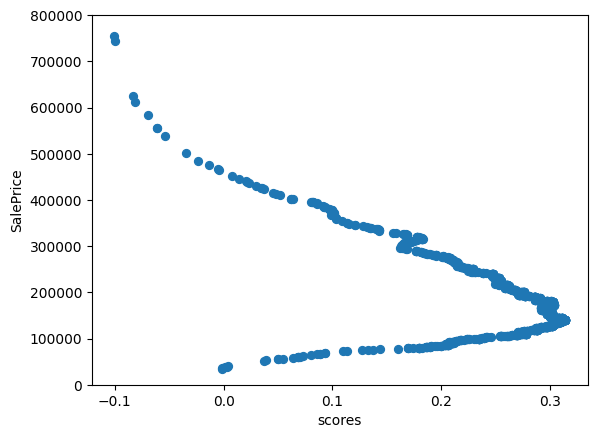

In [128]:
var = 'scores'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32);
     